In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/GitHub/master-thesis

import sys
sys.path.append('/content/gdrive/My Drive/GitHub/master-thesis')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/GitHub/master-thesis


In [3]:
from model.methods import *
from model.modelcore import epid_model
from model.modelhelper import *
from clustering.utils import *

# Load Observations

In [4]:
observation = 'hospitalization' #'newly_infected' #'hospitalization'
rolling_avg_obs = 2
# Overall Time Period
start_time='2020-08-01' # Mitte November/ Anfang Dezember bis Februar
end_time='2021-02-01' # Begin Vaccination Wave

df_obs_initial = pd.read_csv('data/observations.csv' , sep=';', thousands='.', decimal=',', encoding='utf-8', parse_dates=['Date'])

# Initialize Observations Training
df_obs, initial_newly_infected = initialize_observations(df_obs_initial, start=start_time, end=end_time, rolling_avg=rolling_avg_obs)
df_obs.drop(columns=['number_of_deaths', 'newly_infected'], inplace=True)
df_obs.rename(columns={'Date':'date', 'hospitalization': 'observed'}, inplace=True)
df_obs.head(3)

,date,observed
0,2020-08-01,3.5
1,2020-08-02,3.0
2,2020-08-03,4.5


# Load Experiment Results

In [5]:
df_comparison = df_obs.copy()
#path_results = 'data/modeling/results/all_data/'
path_results = 'data/modeling/results/split/'
list_files = os.listdir(path_results)
list_col_names = []
for f in list_files:
  col_name = f[26:46]
  list_col_names.append(col_name)
  df_temp = pd.read_csv(path_results+f)
  df_comparison[col_name] = df_temp['expected_hospitalisation']
df_comparison

,date,observed,linear_mobility_data,linear_group_data_1_
0,2020-08-01,3.5,2.500000e-14,2.500000e-14
1,2020-08-02,3.0,5.795360e-02,5.819460e-02
2,2020-08-03,4.5,1.743520e-01,1.750770e-01
3,2020-08-04,6.0,3.751113e-01,3.766712e-01
4,2020-08-05,6.0,5.995297e-01,6.020228e-01
...,...,...,...,...
179,2021-01-27,54.0,5.578173e+00,1.092985e+02
180,2021-01-28,54.5,5.258160e+00,1.075710e+02
181,2021-01-29,49.5,4.959142e+00,1.059877e+02
182,2021-01-30,38.5,4.680150e+00,1.044146e+02


# Calculate Metrics

In [6]:
def calc_mse(observed, expected):
  diff = expected - observed
  square = np.square(diff)
  msr = square.mean()
  return msr

In [7]:
list_mse = []
for col in list_col_names:
  mse_temp = calc_mse(df_comparison['observed'].to_numpy(), df_comparison[col].to_numpy())
  list_mse.append(mse_temp)
list_mse

[2509.1294663466097, 353.7214183007221]

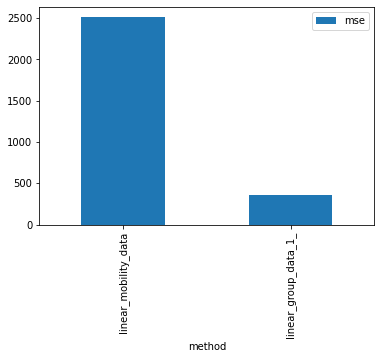

In [8]:
df_metrics = pd.DataFrame()
df_metrics['method'] = list_col_names
df_metrics['mse'] = list_mse
df_metrics.plot.bar(x='method')

# Visual Comparison of Hospitalizations

In [9]:
df_comparison_long = pd.melt(df_comparison, id_vars=['date'])

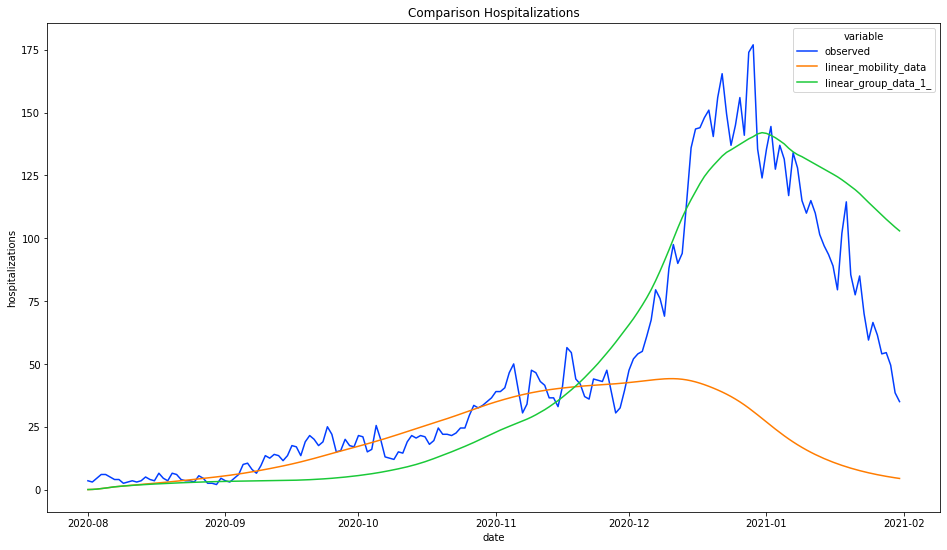

In [10]:
fig, ax = plt.subplots(figsize=(16, 9))
plt.title('Comparison Hospitalizations')
sns.lineplot(data=df_comparison_long, x='date', y='value', hue='variable', palette='bright', ax=ax)
ax.set_ylabel('hospitalizations')
ax.set_xlabel('date')
plt.show()